<a href="https://colab.research.google.com/github/Mjcherono/Soccer_Match_predictions/blob/main/SoccerScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Soccer Match Predictions


The data is soccer data. The numbers under each column are the respective percentage predictions.

The directory is as follows:

1X2 means:
 1 for home team win

X draw

2 away team win


1 home team win

X draw

2.means  away team win

1.5 means that the total goals scored at the end of the game to be not less than 2

2.5 means that the total goals scored at the end of the game to be not less than 3 

3.5 means that the total goals scored at the end of the game to be not less than 4.

BTS means both teams to score at least a goal

OTS means only one team to score a goal(s) at the end of the game

Actual outcome means the end result of the game.

In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import warnings
warnings.filterwarnings("ignore")

### Loading dataset

In [91]:
#Loading excel file
soccer = pd.read_excel("/content/soccer.xlsx")

soccer_new = pd.read_excel('/content/Soccer_new.xlsx')

In [92]:
#preview of head
print(soccer.head())


  1X2   1   x   2  1.5  2.5  3.5  BTS  OTS       Actual Outcome
0   1  55  23  22   85   70   55   60   40  2021-03-03 00:00:00
1  X2  29  32  39   70   40   15   55   45  2021-02-03 00:00:00
2   1  48  26  26   95   67   34   61   39  2021-01-04 00:00:00
3  X2  36  30  34   65   35   15   40   60  2021-01-02 00:00:00
4  1X  48  32  20   77   43   21   48   52                  1-0


In [93]:
#new soccer dataset
print(soccer_new.head())

  1X2  probability_home_win   x  ...  OTS  HOME SCORE  AWAY SCORE
0   1                    55  23  ...   40           3           3
1  X2                    29  32  ...   45           3           2
2   1                    48  26  ...   39           4           1
3  X2                    36  30  ...   60           2           1
4  1X                    48  32  ...   52           1           0

[5 rows x 11 columns]


In [94]:
soccer['Actual Outcome'].nunique()

63

In [95]:
#dimensions
soccer_new.shape

(4687, 11)

In [96]:
#dimensions
soccer.shape

(4687, 10)

In [97]:
soccer.columns

Index(['1X2', 1, 'x', 2, 1.5, 2.5, 3.5, 'BTS', 'OTS', 'Actual Outcome'], dtype='object')

In [98]:
#unique values
soccer['1X2'].value_counts()

1      1876
2      1081
X2      682
1X      648
X       217
12      174
X         6
X2        2
1X        1
Name: 1X2, dtype: int64

In [99]:
soccer['1X2'].nunique()

9

In [100]:
soccer[1].nunique()

71

In [101]:
soccer['x'].nunique()

39

In [102]:
soccer[2].nunique()

71

In [103]:
soccer[2.5].nunique()

60

In [104]:
soccer[3.5].nunique()

66

In [105]:
soccer['BTS'].nunique()

58

In [106]:
soccer['OTS'].nunique()

57

In [107]:
soccer['Actual Outcome'].unique()

array([datetime.datetime(2021, 3, 3, 0, 0),
       datetime.datetime(2021, 2, 3, 0, 0),
       datetime.datetime(2021, 1, 4, 0, 0),
       datetime.datetime(2021, 1, 2, 0, 0), '1-0',
       datetime.datetime(2021, 3, 2, 0, 0), '0-1',
       datetime.datetime(2021, 3, 1, 0, 0),
       datetime.datetime(2021, 2, 1, 0, 0),
       datetime.datetime(2021, 2, 2, 0, 0), '2-0',
       datetime.datetime(2021, 1, 3, 0, 0),
       datetime.datetime(2021, 1, 1, 0, 0), '0-2', '3-0', '0-0', '0-6',
       datetime.datetime(2021, 1, 6, 0, 0),
       datetime.datetime(2021, 5, 2, 0, 0), '0-3',
       datetime.datetime(2021, 5, 3, 0, 0),
       datetime.datetime(2021, 4, 2, 0, 0),
       datetime.datetime(2021, 1, 5, 0, 0),
       datetime.datetime(2021, 4, 1, 0, 0), '6-0',
       datetime.datetime(2021, 2, 6, 0, 0), '4-0',
       datetime.datetime(2021, 3, 4, 0, 0), '0-4',
       datetime.datetime(2021, 2, 4, 0, 0),
       datetime.datetime(2021, 1, 9, 0, 0),
       datetime.datetime(2021, 2, 5, 0, 0),

### Data Preprocessing.

In [108]:
#Null values
soccer.isnull().sum()

1X2               0
1                 0
x                 0
2                 0
1.5               0
2.5               0
3.5               0
BTS               0
OTS               0
Actual Outcome    0
dtype: int64

In [109]:
#Duplicates
soccer.duplicated().sum()

#dropping the null
soccer.drop_duplicates(inplace=True)

soccer.duplicated().sum()

0

### Feature Engineering.

In [110]:
soccer_new

,1X2,probability_home_win,x,probability_away_win,probability_over_1,probability_over_2.5,probability_over_3.5,BTS,OTS,HOME SCORE,AWAY SCORE
0,1,55,23,22,85,70,55,60,40,3,3
1,X2,29,32,39,70,40,15,55,45,3,2
2,1,48,26,26,95,67,34,61,39,4,1
3,X2,36,30,34,65,35,15,40,60,2,1
4,1X,48,32,20,77,43,21,48,52,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4682,1,82,10,8,80,55,35,40,60,5,0
4683,1X,45,32,23,63,49,34,57,43,3,3
4684,1,72,13,15,95,83,27,40,60,4,0
4685,1,48,27,25,74,46,16,58,42,2,0


In [111]:
soccer_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   1X2                   4687 non-null   object
 1   probability_home_win  4687 non-null   int64 
 2   x                     4687 non-null   int64 
 3   probability_away_win  4687 non-null   int64 
 4   probability_over_1    4687 non-null   int64 
 5   probability_over_2.5  4687 non-null   int64 
 6   probability_over_3.5  4687 non-null   int64 
 7   BTS                   4687 non-null   int64 
 8   OTS                   4687 non-null   int64 
 9   HOME SCORE            4687 non-null   int64 
 10  AWAY SCORE            4687 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 402.9+ KB


In [112]:
#Value counts of the 1X2 column

soccer_new['1X2'].value_counts()
soccer_new['1X2'].value_counts(normalize=True)*100

1      40.025603
2      23.063793
X2     14.550885
1X     13.825475
X       4.629827
12      3.712396
X       0.128014
X2      0.042671
1X      0.021336
Name: 1X2, dtype: float64

Renaming Columns


In [113]:
soccer_new.columns

Index(['1X2', 'probability_home_win', 'x', 'probability_away_win',
       'probability_over_1', 'probability_over_2.5', 'probability_over_3.5',
       'BTS', 'OTS', 'HOME SCORE', 'AWAY SCORE'],
      dtype='object')

In [114]:
soccer_new.rename({'1X2': 'Type_of_win', 'probability_home_win': 'probability_home_win', 'x': 'probability_draw', 'probability_away_win': 'probability_away_win', 'probability_over_1.5': 'probability_over_1.5', 'probability_over_2.5': 'probability_over_2.5'
                    , 'probability_over_3.5': 'probability_over_3.5', 'BTS': 'probability_both_teams_score', 'OTS': 'probability_only_one_team_scores', 'HOME SCORE': 'home_score', 'AWAY SCORE': 'away_score'}, axis=1, inplace=True)



#### Analysis

In [115]:
soccer_new.head()

,Type_of_win,probability_home_win,probability_draw,probability_away_win,probability_over_1,probability_over_2.5,probability_over_3.5,probability_both_teams_score,probability_only_one_team_scores,home_score,away_score
0,1,55,23,22,85,70,55,60,40,3,3
1,X2,29,32,39,70,40,15,55,45,3,2
2,1,48,26,26,95,67,34,61,39,4,1
3,X2,36,30,34,65,35,15,40,60,2,1
4,1X,48,32,20,77,43,21,48,52,1,0


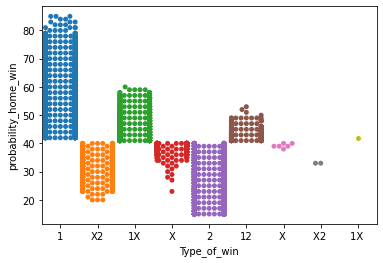

In [116]:
#swarm plot for Wins column
import seaborn as sns

sns.swarmplot(x = 'Type_of_win', y = 'probability_home_win', data = soccer_new)
plt.show()

In [117]:
soccer_new.head()

,Type_of_win,probability_home_win,probability_draw,probability_away_win,probability_over_1,probability_over_2.5,probability_over_3.5,probability_both_teams_score,probability_only_one_team_scores,home_score,away_score
0,1,55,23,22,85,70,55,60,40,3,3
1,X2,29,32,39,70,40,15,55,45,3,2
2,1,48,26,26,95,67,34,61,39,4,1
3,X2,36,30,34,65,35,15,40,60,2,1
4,1X,48,32,20,77,43,21,48,52,1,0


In [118]:
soccer_new.columns

Index(['Type_of_win', 'probability_home_win', 'probability_draw',
       'probability_away_win', 'probability_over_1', 'probability_over_2.5',
       'probability_over_3.5', 'probability_both_teams_score',
       'probability_only_one_team_scores', 'home_score', 'away_score'],
      dtype='object')

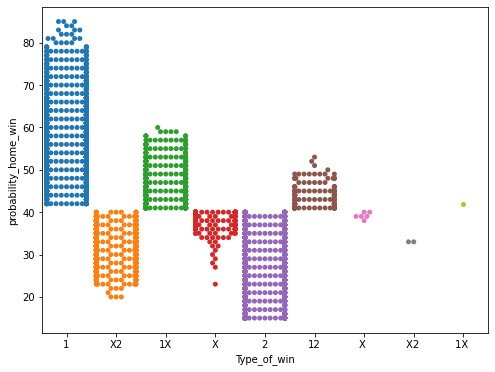

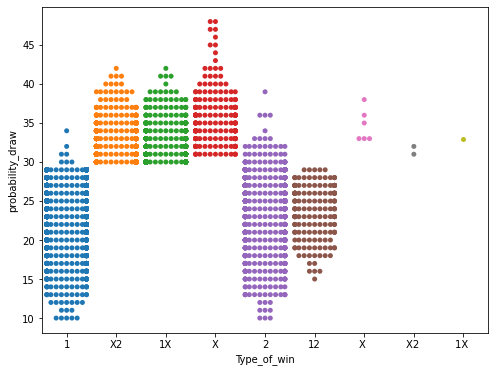

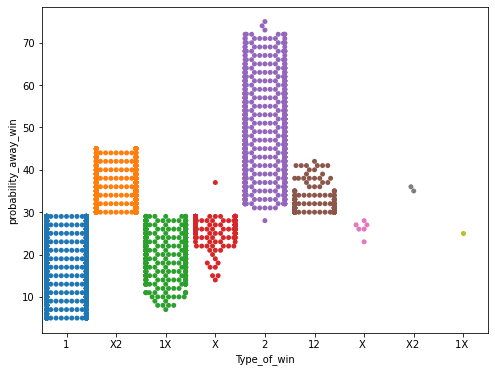

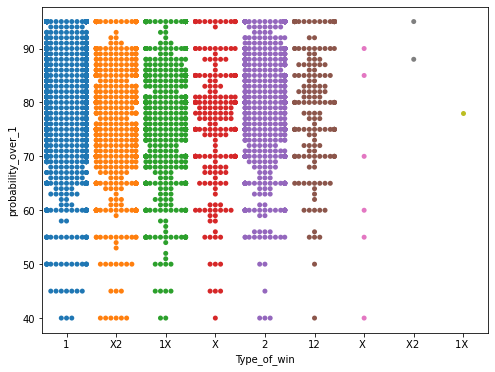

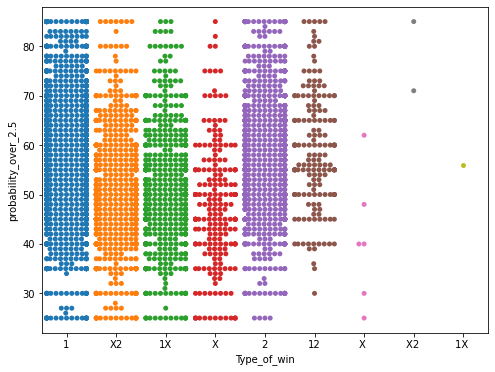

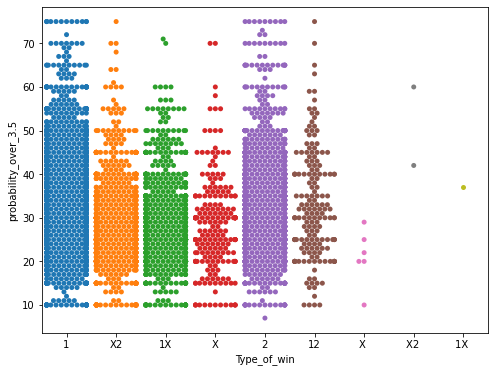

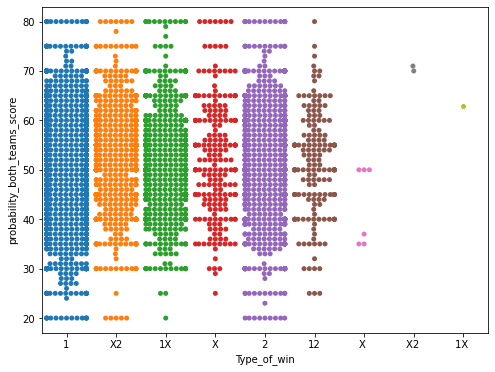

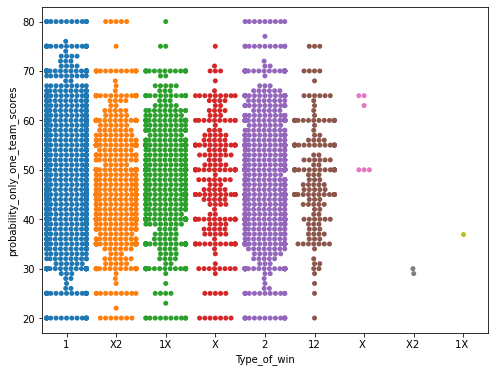

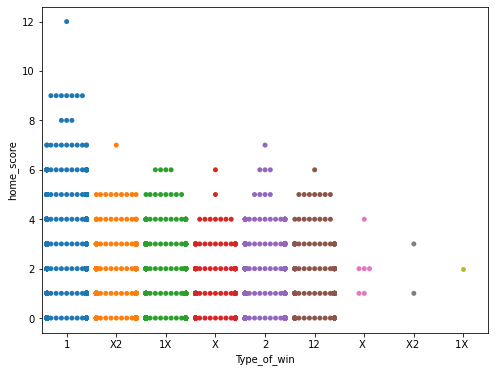

In [ ]:
m = ['probability_home_win', 'probability_draw',
       'probability_away_win', 'probability_over_1', 'probability_over_2.5',
       'probability_over_3.5', 'probability_both_teams_score',
       'probability_only_one_team_scores', 'home_score', 'away_score']

for i in m:
  fig = plt.figure(figsize=(8, 6))
  sns.swarmplot(x = 'Type_of_win', y = i, data = soccer_new)
  plt.show()